In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
from geoplot import geoplot as gplt
%matplotlib inline

In [2]:
# Shim to download the dataset being used here, if it has not been downloaded already.
# cf. https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
import os

if not os.path.isfile("./data/NYPD Motor Vehicle Collisions.csv"):
    import requests
    with open("./data/NYPD Motor Vehicle Collisions.csv", "w") as f:
        f.write(requests.get("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD").text)

In [3]:
cdata = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)

In [4]:
def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(lat, long)

collisions = gpd.GeoDataFrame(cdata.head(1000), geometry=cdata.head(1000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(385)aggplot()
-> fig = plt.plot(figsize=figsize)
(Pdb) c
> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(430)aggplot()
-> ax.set_extent((bxmin, bxmax, bymin, bymax), crs=ccrs.PlateCarree())
(Pdb) c


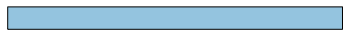

In [5]:
# Test result on Windows: OK.
gplt.aggplot(collisions.head(5), projection=ccrs.AlbersEqualArea(), threshold=5,
             hue='NUMBER OF PERSONS INJURED', cmap='Blues')

In [ ]:
# Test result on Mac OSX: kernel death.
# cf. https://github.com/Toblerity/Shapely/issues/435
# cf. https://github.com/Toblerity/Shapely/issues/416
gplt.aggplot(collisions.head(5), projection=ccrs.AlbersEqualArea(), threshold=5,
             hue='NUMBER OF PERSONS INJURED', cmap='Blues')

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(385)aggplot()
-> fig = plt.plot(figsize=figsize)
(Pdb) s
--Call--
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/matplotlib/pyplot.py(3145)plot()
-> @_autogen_docstring(Axes.plot)
(Pdb) c
> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(430)aggplot()
-> ax.set_extent((bxmin, bxmax, bymin, bymax), crs=ccrs.PlateCarree())
(Pdb) s
--Call--
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/crs.py(666)__init__()
-> def __init__(self, central_longitude=0.0, globe=None):
(Pdb) n
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/crs.py(667)__init__()
-> proj4_params = [('proj', 'eqc'), ('lon_0', central_longitude)]
(Pdb) 
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/crs.py(668)__init__()
-> if globe is None:
(Pdb) 
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/crs.py(669)__init__()
-> globe = Globe(semimajor_axis=math.d